In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## columns 설명

- Id - 플레이어의 Id
- groupId - 경기 내의 그룹을 식별하는 ID. 현재 그룹의 선수들이 서로 다른 경기에서 경기한다면, 그들은 매번 다른 groupId를 갖게 될 것이다.
- matchId - 경기를 식별하기 위한 ID. train set과 test set에 모두 있는 시합은 없다.
- matchDuration - 경기 시간.
- matchType - 경기 종류(duo, quad ...).
- assists - 팀 동료들과 같이 죽인 적 수이다.
- boosts - 부스트 아이템 사용한 수.
- damageDealt - 가한 데미지 총량. Note: 자신에게 가한 데미지는 제외.
- DBNOs - 빈사상태로 만든 적의 수.
- headshotKills - 헤드샷 으로 처리한 적의 수.
- heals - 치료 아이템 사용 수.
- killPlace - 경기에서 처치한 적의 수 랭킹.
- killPoints - 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, 
- killPoints에서 0은 "없음"으로 처리되어야 한다.
- kills - 처치한 적의 수.
- killStreaks - 단기간에 가장 많이 처치한 적의 최대치.
- longestKill - 플레이어가 적을 죽인 가장 긴 거리. 선수를 다운시키고 멀리 운전하는 것이 가장 긴 처치로 이어질 수 있기 때문에 오해의 소지가 있을 수 있다.
- maxPlace - 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
- numGroups - 경기에 있는 팀의 수.
- rankPoints - Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
- revives - 플레이어가 팀원 회복 시킨 수.
- rideDistance - 차량으로 이동한 거리(단위 : 미터).
- roadKills - 차량으로 죽인 플레이어 수.
- swimDistance - 수영한 거리(단위 : 미터).
- teamKills - 팀킬한 횟수.
- vehicleDestroys - 차량을 폭파시킨 횟수.
- walkDistance - 걸은 총 거리(단위 : 미터).
- weaponsAcquired - 무기 얻은 갯수.
- winPoints - 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, 
- winPoints에서 0은 "없음"으로 처리되어야 한다.
- winPlacePerc - 예측 목표. 순위의 퍼센트로 표시되며, 1이면 경기에서 1등이고 0이면 경기에서 꼴지 했다는 것이다. 이것은 numGroups로 계산되는게 아니라, maxPlace로 계산되기 때문에 누락되는 것이 있을수도다

In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/이어드림스쿨/Project/ML_project/PUBG_ML_team_project/pubg-finish-placement-prediction/train_V2.csv')
data = reduce_mem_usage(data)
data.info()

In [5]:
pd.set_option('display.max_columns', 30)
data.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137


## EDA
        - longestKill
        - headshotKills
        - killStreaks
        - kills
        - DBNOs
        - damageDealt

In [6]:
ori_data = data.copy()

In [ ]:
data.isna().sum() # winPlacePerc 1개 결측치 drop
data = data.dropna()
data.isna().sum()

In [8]:
my_data = data[['damageDealt', 'DBNOs', 'headshotKills', 'kills', 'killStreaks', 'longestKill', 'winPlacePerc']]
my_data.head(2)

,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,winPlacePerc
0,0.0,0,0,0,0,0.0,0.444336
1,91.5,0,0,0,0,0.0,0.640137


### correlation

In [9]:
my_data.corr()

,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,winPlacePerc
damageDealt,1.000000,0.735762,0.613409,0.888784,0.703599,0.563838,0.440506
DBNOs,0.735762,1.000000,0.469923,0.707848,0.646872,0.451422,0.279968
headshotKills,0.613409,0.469923,1.000000,0.674275,0.512882,0.447261,0.277722
kills,0.888784,0.707848,0.674275,1.000000,0.802500,0.602937,0.419915
killStreaks,0.703599,0.646872,0.512882,0.802500,1.000000,0.515097,0.377566
longestKill,0.563838,0.451422,0.447261,0.602937,0.515097,1.000000,0.410153
winPlacePerc,0.440506,0.279968,0.277722,0.419915,0.377566,0.410153,1.000000


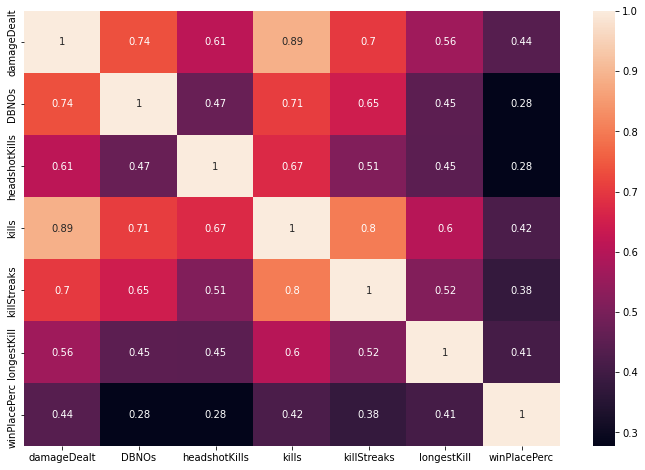

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data=my_data.corr(), annot = True)
plt.show()

 - correlation
    - kills : damageDealt (0.89), KillStreaks (0.8), DBNOs (0.71)
    - longestKill : kills (0.6), headshotkills (0.45)


 => 모든 columns.corr는 양의 상관관계를 보이고, 상관계수가 큰 경우가 많은 것을 확인 (다중공선성)

### column별 데이터 분포 확인

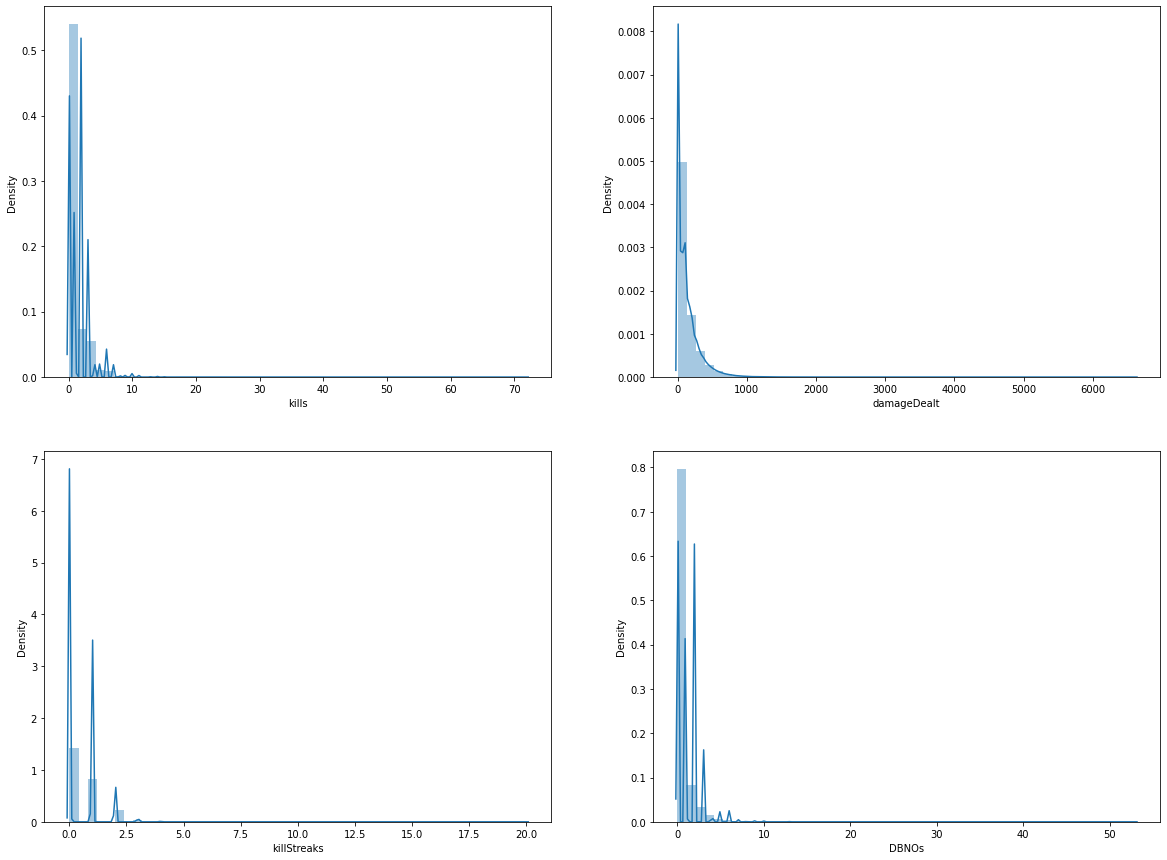

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.distplot(my_data.kills)

plt.subplot(2,2,2)
sns.distplot(my_data.damageDealt)

plt.subplot(2,2,3)
sns.distplot(my_data.killStreaks)

plt.subplot(2,2,4)
sns.distplot(my_data.DBNOs)

plt.show()

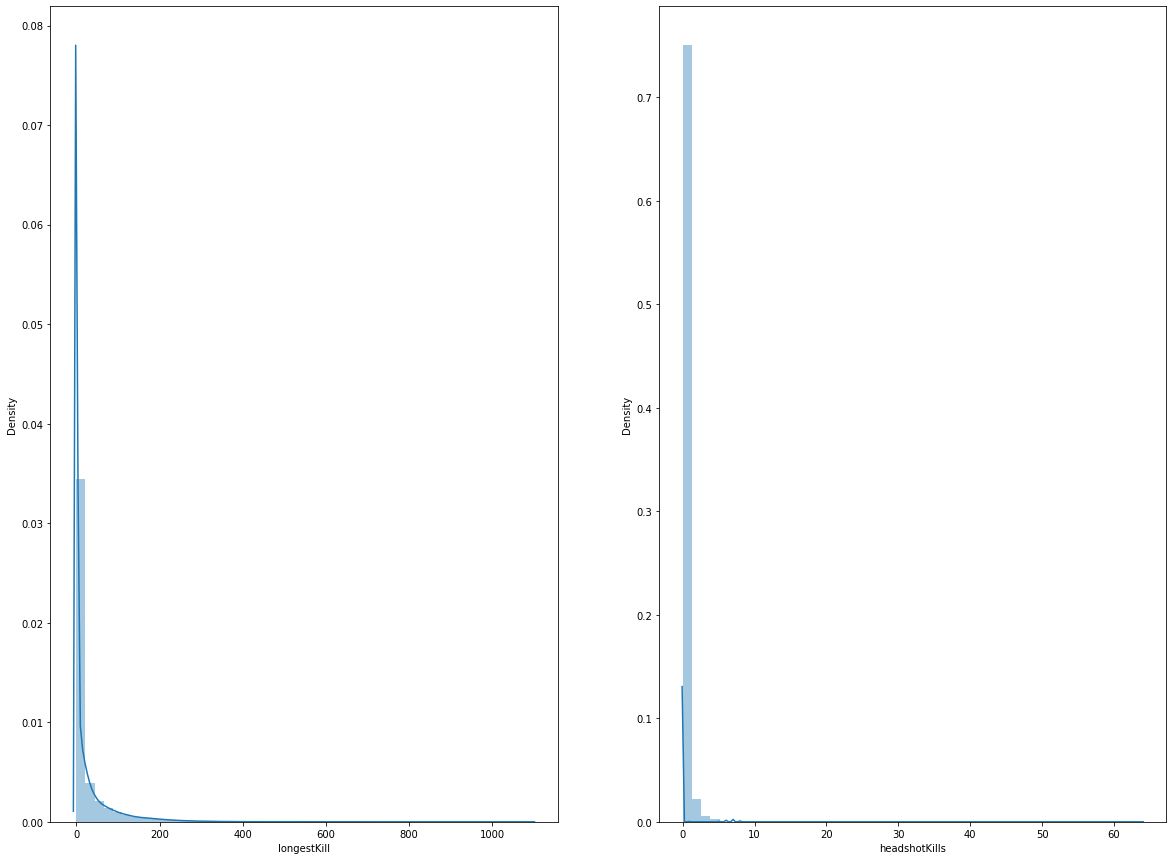

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
sns.distplot(my_data.longestKill)

plt.subplot(1,2,2)
sns.distplot(my_data.headshotKills)

plt.show()

### column별 EDA 진행

##### longestKill
- 맵 전체의 크기가 에란겔 기준 8x8km, longestKill의 max는 1094. 따라서 m단위라고 생각
- 최대 스코프가 16배, 따라서, 대략 800m이상은 이상치로 판단
-  유튜브 찾아본 결과 3년 전 영상 중 '배그 최초 M24 948m 저격' 있음

In [21]:
my_data.longestKill.max()

1094.0

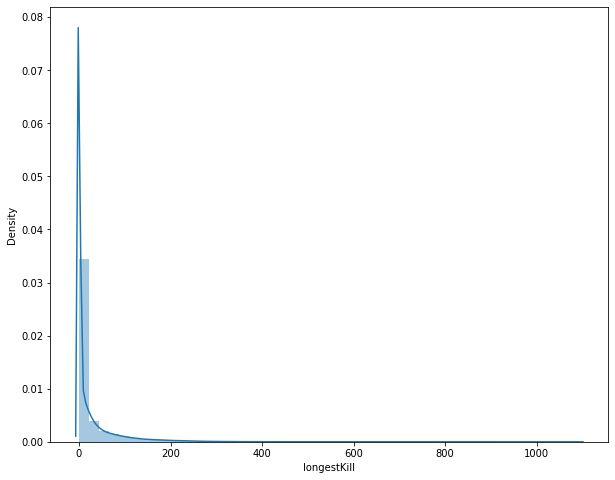

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(my_data['longestKill'])
plt.show()

##### longestkill, headshotkills
- longestkill이 증가함에 따라 headshotkills가 증가함을 확인

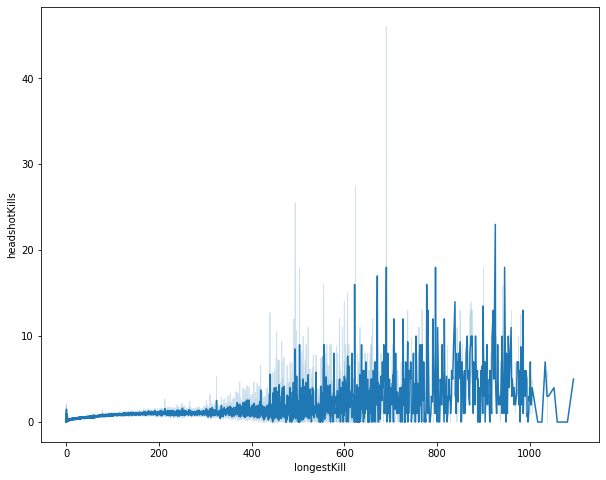

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(data=my_data, x='longestKill', y='headshotKills')
plt.show()

##### killStreaks, kills
-> killStreaks가 kills에 포함되고 상관계수가 0.8로 높으므로 drop

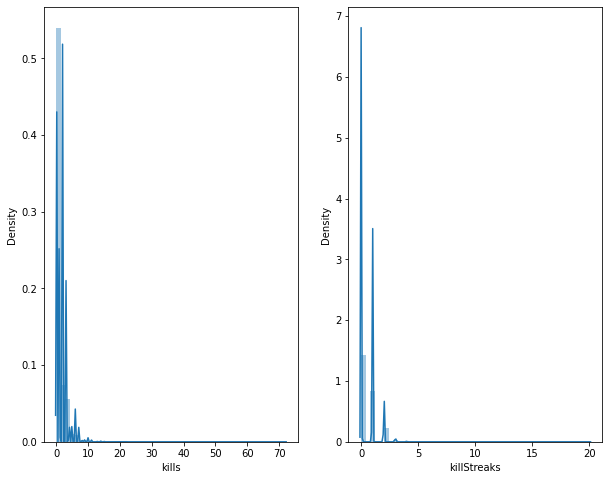

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(my_data['kills'])

plt.subplot(1,2,2)
sns.distplot(my_data['killStreaks'])

plt.show()

In [16]:
print(np.sum(my_data.killStreaks == my_data.kills))
print(np.sum(my_data.killStreaks < my_data.kills))
print(np.sum(my_data.killStreaks > my_data.kills))

3611760
835205
0


##### DBNOs
- 대부분의 데이터가 0에 있음을 확인

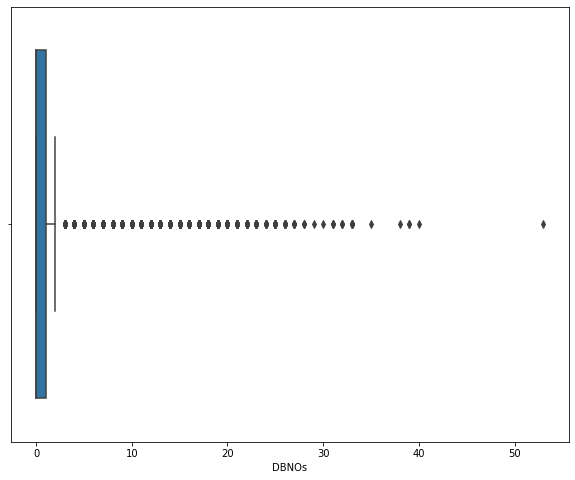

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=my_data, x='DBNOs')
plt.show()

##### damageDealt
- 대부분의 데이터가 0에 있음을 확인

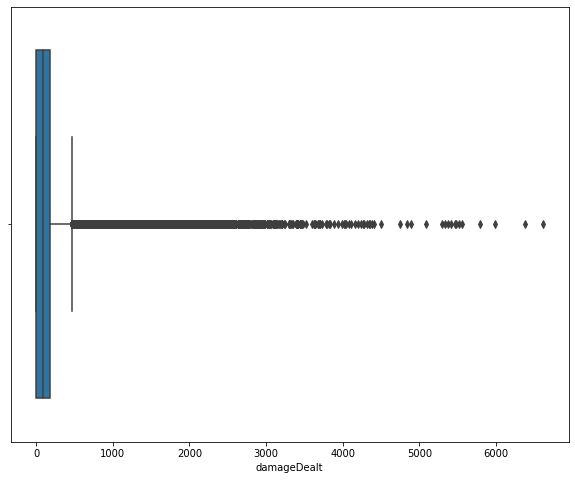

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(data=my_data, x='damageDealt')
plt.show()